In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [13]:
# Read the dataset
df = pd.read_csv('D:/Semester 8/NLP/IA/sentimentanalyis_1-main/Labelling reviews/labelled_reviews2.csv')

# Split the dataset into train and test sets
train, test = train_test_split(df, test_size=0.2, random_state=25)

In [14]:
# Extract features and labels
X_train = train['new_reviews']
y_train = train['Sentiment']
X_test = test['new_reviews']
y_test = test['Sentiment']

In [15]:
# Vectorize the text data
vectorizer = CountVectorizer(binary=True, stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [16]:
# Train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_vec, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# Make predictions
y_pred = rf_classifier.predict(X_test_vec)


In [18]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100)

Accuracy: 96.23698959167334


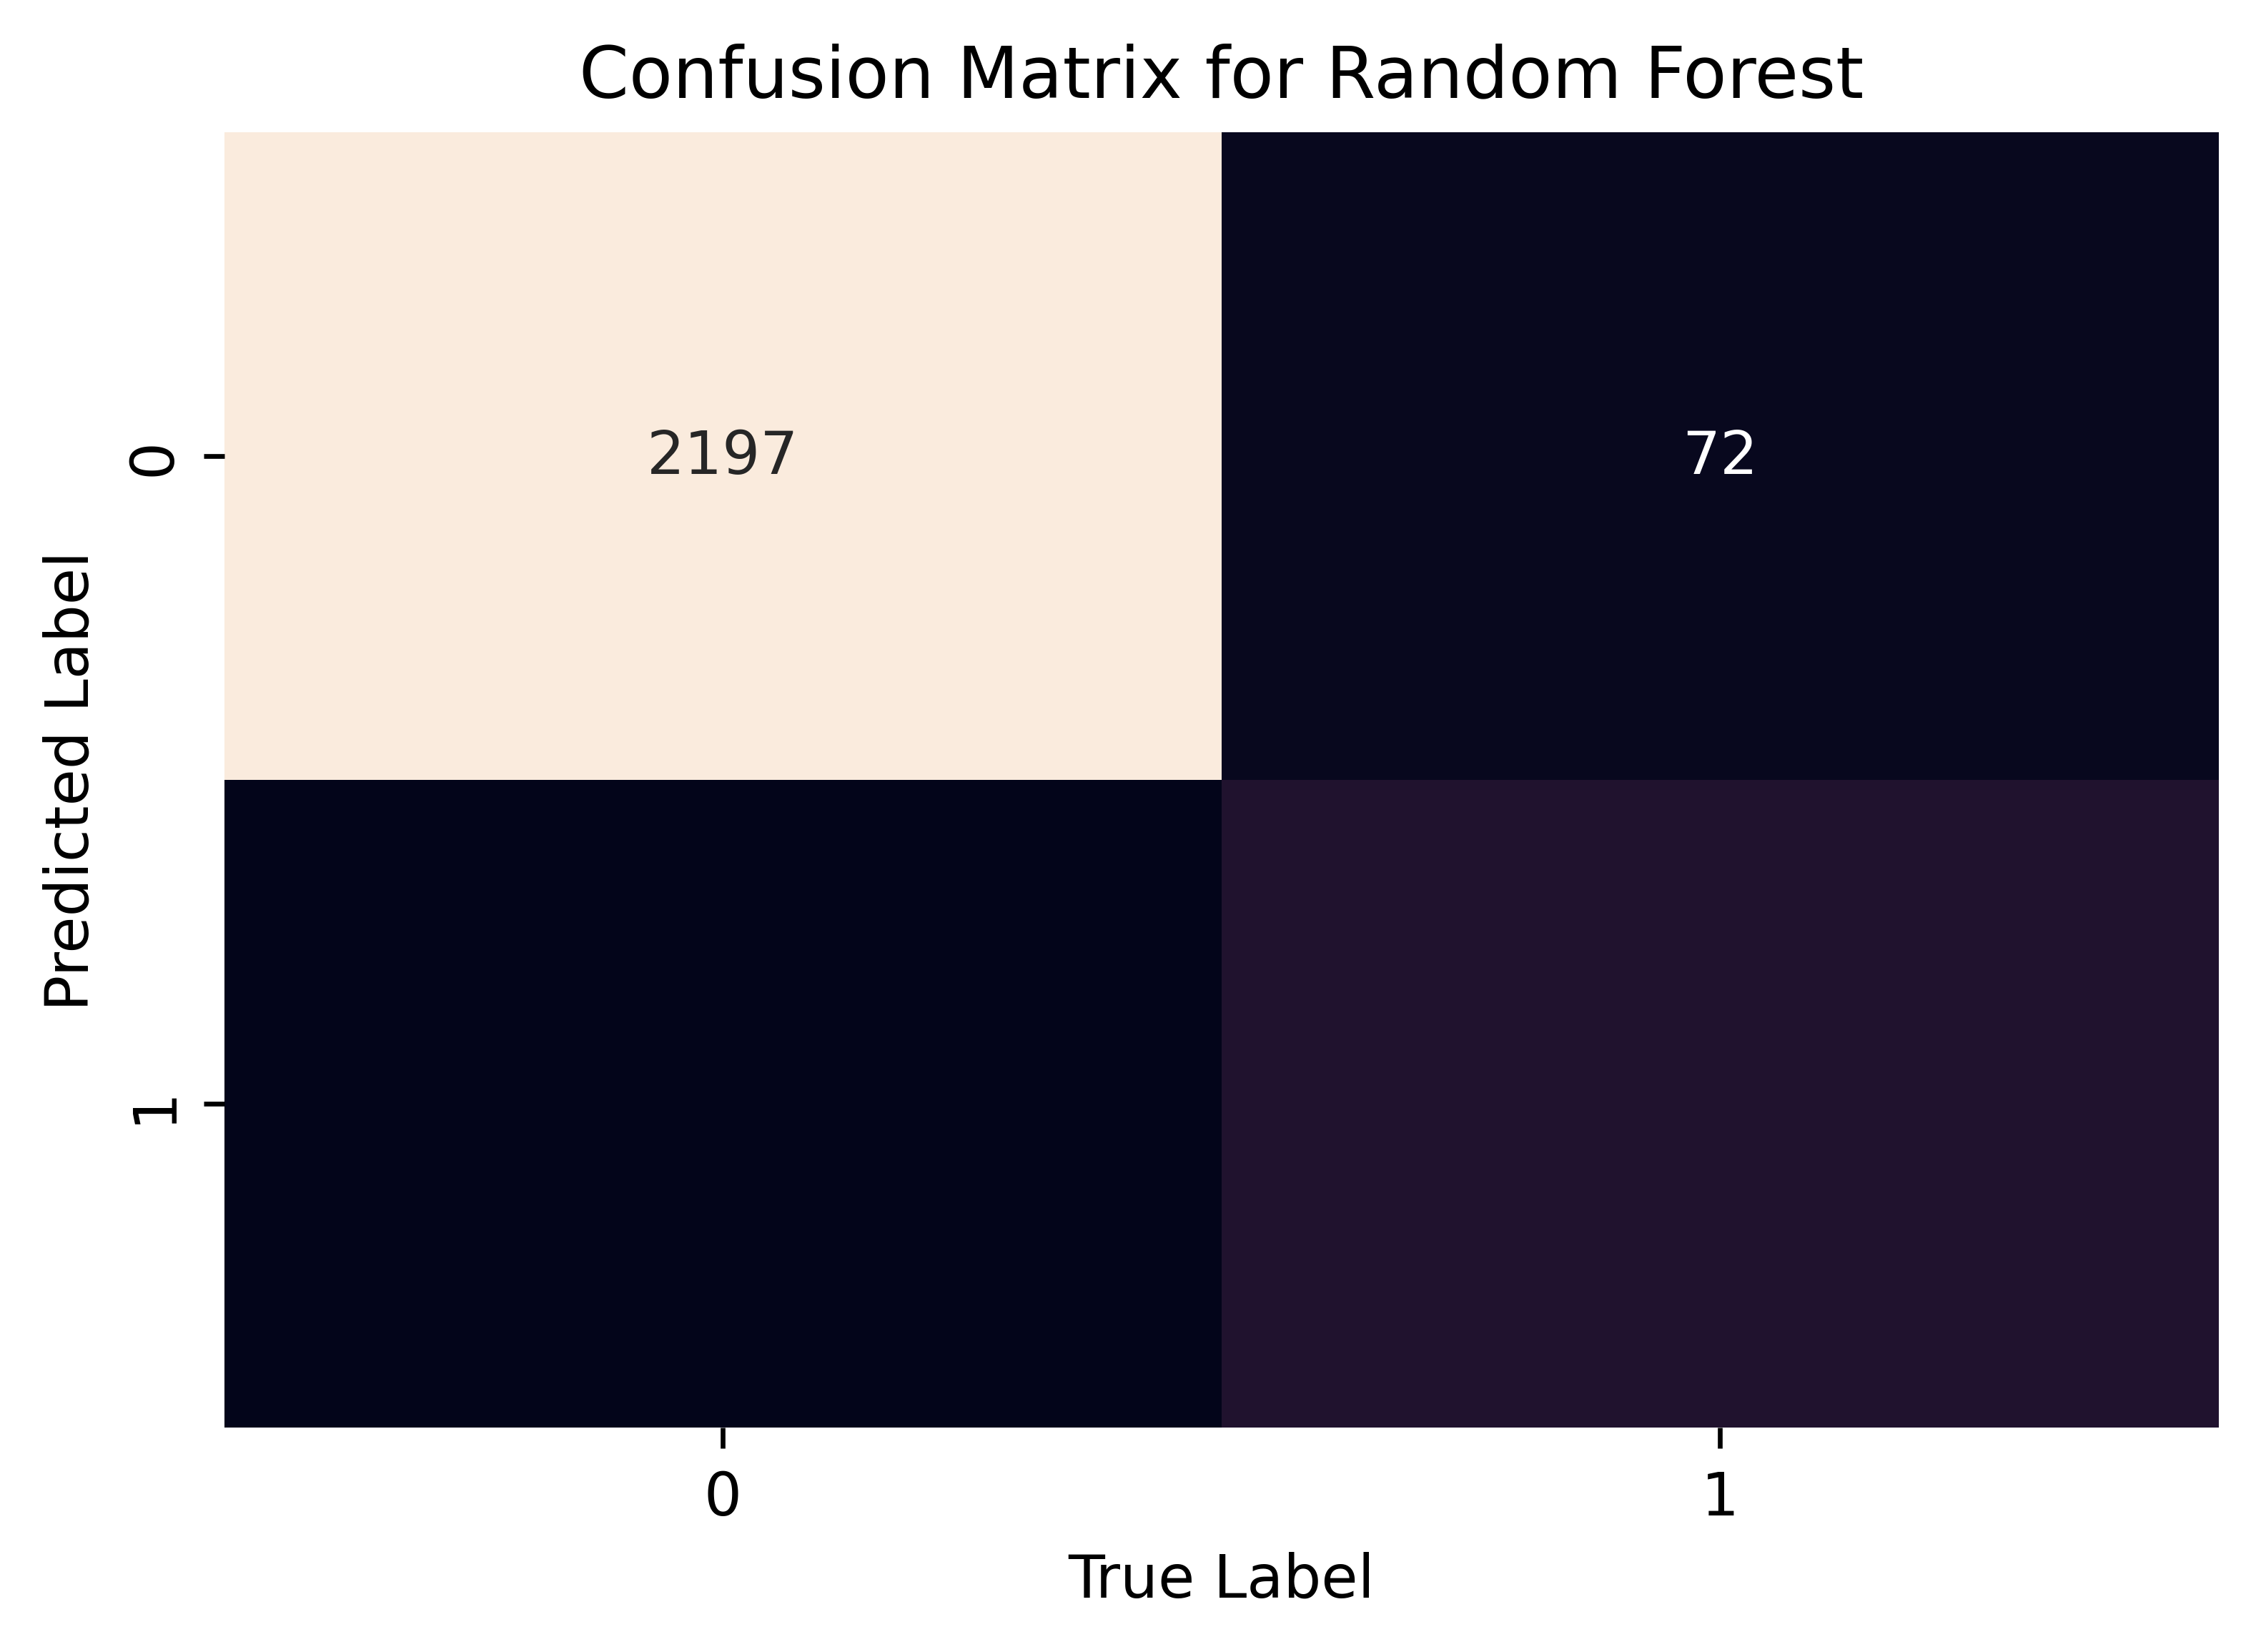

In [19]:
# Plot confusion matrix
plt.figure(dpi=600)
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

In [20]:
# Save the model to a file
with open("random_forest_model.pkl", "wb") as file:
    pickle.dump(rf_classifier, file)

In [21]:
# Load the model from file (for demonstration)
with open("random_forest_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

In [24]:
tex = []
s = input("Enter tweet: ")
tex.append(s)

# Vectorize the input tweet
document_term_matrix = vectorizer.transform(tex)

# Make predictions
y_pred = loaded_model.predict(document_term_matrix)
print("Predicted Sentiment:", y_pred)

Predicted Sentiment: [0]
